In [1]:
!pip install Keras-Preprocessing


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 617.7 kB/s eta 0:00:000:00:01


In [3]:
import os
import cv2
import numpy as np
import random
import time
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

In [38]:
PATH = "/kaggle/input/datasetca/CoLeaf DATASET"
CLASSES = ['boron-B', 'calcium-Ca', 'healthy', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'more-deficiencies', 'nitrogen-N', 'phosphorus-P','potasium-K']
data= []

In [39]:
for category in CLASSES:
    category_path = os.path.join(PATH, category)
    label = CLASSES.index(category)
   
    for image in os.listdir(category_path):
        img_path = os.path.join(category_path,image)
        img_arr = cv2.imread(img_path)
        if img_arr is not None:
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, label])


random.shuffle(data)


x = []
y = []
for features, label in data:
    x.append(features)
    y.append(label)

X = np.array(x) / 255.0  
Y = np.array(y)


In [42]:
import matplotlib.pyplot as plt

def plot_hist_CNN(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
def plot_hist_CNN1(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

Epoch 1/50
13/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1481 - loss: 2.2802

W0000 00:00:1716289575.620327     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.1672 - loss: 2.2551

W0000 00:00:1716289578.369658     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.1682 - loss: 2.2538 - val_accuracy: 0.2333 - val_loss: 2.1901
Epoch 2/50
 9/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2378 - loss: 2.1844

W0000 00:00:1716289578.731003     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2456 - loss: 2.1576 - val_accuracy: 0.2333 - val_loss: 2.1413
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2607 - loss: 2.0700 - val_accuracy: 0.2333 - val_loss: 2.0403
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2740 - loss: 1.9979 - val_accuracy: 0.3444 - val_loss: 1.9131
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3310 - loss: 1.8819 - val_accuracy: 0.3556 - val_loss: 1.8152
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3640 - loss: 1.7898 - val_accuracy: 0.3111 - val_loss: 1.7357
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3547 - loss: 1.7555 - val_accuracy: 0.3333 - val_loss: 1.6653
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3989 - loss: 1.6749 - val_accuracy: 0.3333 - val_loss: 1.6356
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3829 - loss: 1.6517 - val_accuracy: 0.4111 - val_loss: 1.

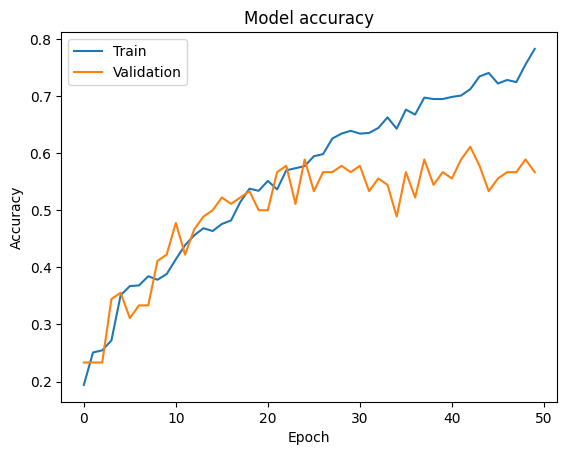

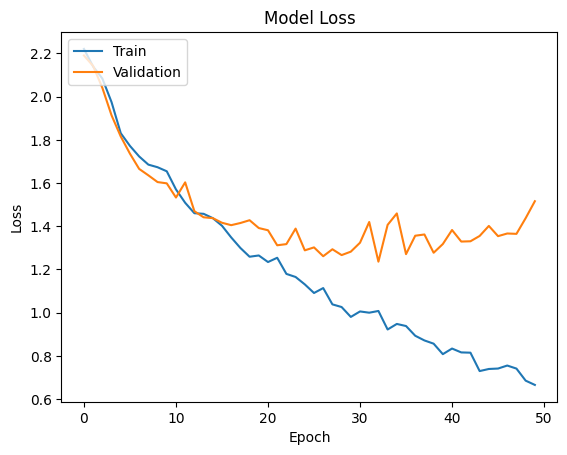

In [43]:
from tensorflow.keras.layers import Dropout
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5)) 
model.add(Dense(len(CLASSES), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
start_time = time.time()
plottingCnn=model.fit(X_train, Y_train, epochs=50,validation_split=0.1, verbose=1)
end_time = time.time()
training_time_CNN = end_time - start_time
print(f'Training time: {training_time_CNN:.2f} seconds')


loss, accuracy_cnn = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test accuracy: {accuracy_cnn * 100:.2f}%')
plot_hist_CNN(plottingCnn)
plot_hist_CNN1(plottingCnn)

In [24]:
!pip install efficientnet

In [25]:
import os
import cv2
import numpy as np
import random
import time
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt

In [44]:
PATH = "/kaggle/input/datasetca/CoLeaf DATASET"
CLASSES = ['boron-B', 'calcium-Ca', 'healthy', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'more-deficiencies', 'nitrogen-N', 'phosphorus-P','potasium-K']
data= []


for category in CLASSES:
    category_path = os.path.join(PATH, category)
    label = CLASSES.index(category)
    for image in os.listdir(category_path):
        img_path = os.path.join(category_path, image)
        img_arr = cv2.imread(img_path)
        if img_arr is not None:
            img_arr = cv2.resize(img_arr, (224, 224))  
            data.append([img_arr, label])


random.shuffle(data)


x = []
y = []
for features, label in data:
    x.append(features)
    y.append(label)

X = np.array(x) / 255.0  
Y = np.array(y)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model= Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(len(CLASSES), activation='softmax')
])


In [46]:
import matplotlib.pyplot as plt

def plot_hist_effectNet(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
def plot_hist_effectNet1(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [47]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = time.time()
ploting  =model.fit(X_train, Y_train, epochs=50,validation_split=0.1, verbose=1)
end_time = time.time()

training_time_effectnet = end_time - start_time
print(f'Training time: {training_time_effectnet:.2f} seconds')
loss, accuracy_effectnet = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test accuracy: {accuracy_effectnet * 100:.2f}%')

Epoch 1/50
 1/26 ━━━━━━━━━━━━━━━━━━━━ 30:50 74s/step - accuracy: 0.0312 - loss: 2.4037

W0000 00:00:1716290574.387482     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4146 - loss: 1.6607   

W0000 00:00:1716290615.400013     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716290620.821277     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.4181 - loss: 1.6508 - val_accuracy: 0.0111 - val_loss: 2.6023
Epoch 2/50


W0000 00:00:1716290623.781605     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.7159 - loss: 0.8304 - val_accuracy: 0.0111 - val_loss: 2.7520
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.8686 - loss: 0.4398 - val_accuracy: 0.0111 - val_loss: 2.8029
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.8906 - loss: 0.3429 - val_accuracy: 0.0111 - val_loss: 3.0392
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9211 - loss: 0.2275 - val_accuracy: 0.0111 - val_loss: 3.1435
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.9328 - loss: 0.2140 - val_accuracy: 0.0111 - val_loss: 3.3175
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.9266 - loss: 0.2227 - val_accuracy: 0.0778 - val_loss: 2.7564
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.9624 - loss: 0.1304 - val_accuracy: 0.1333 - val_loss: 2.8890
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.9435 - loss: 0.1581 - val_accuracy: 0.1333 - val_

W0000 00:00:1716290792.476763     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


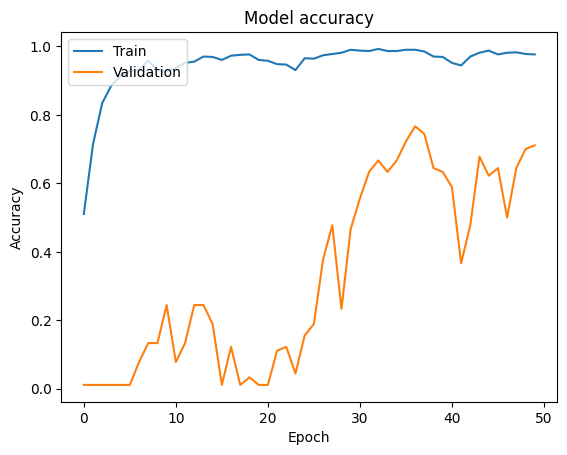

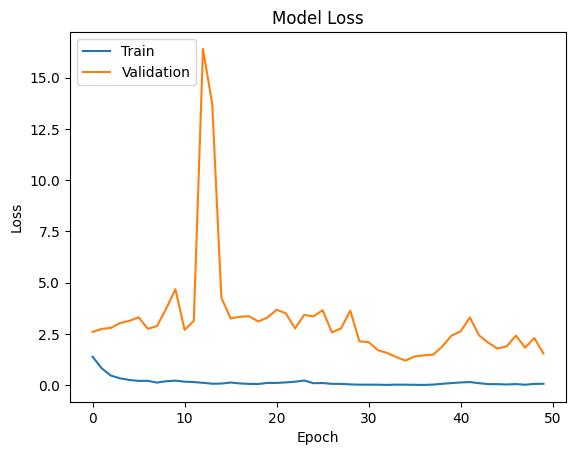

In [48]:
plot_hist_effectNet(ploting)
plot_hist_effectNet1(ploting)

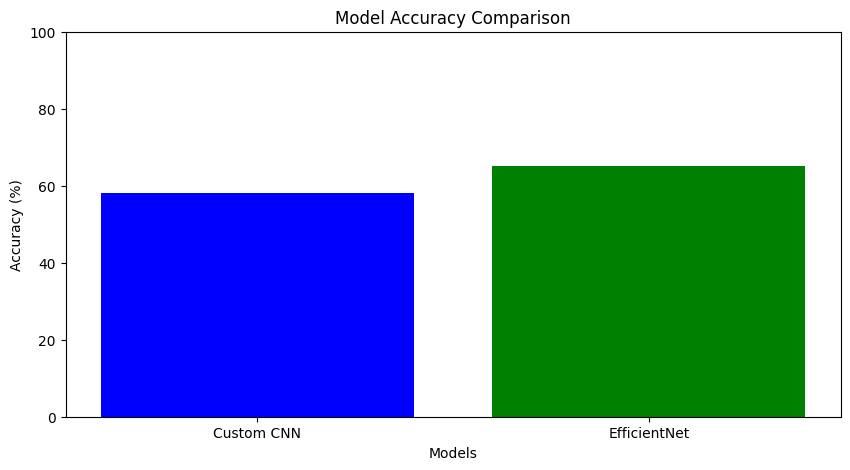

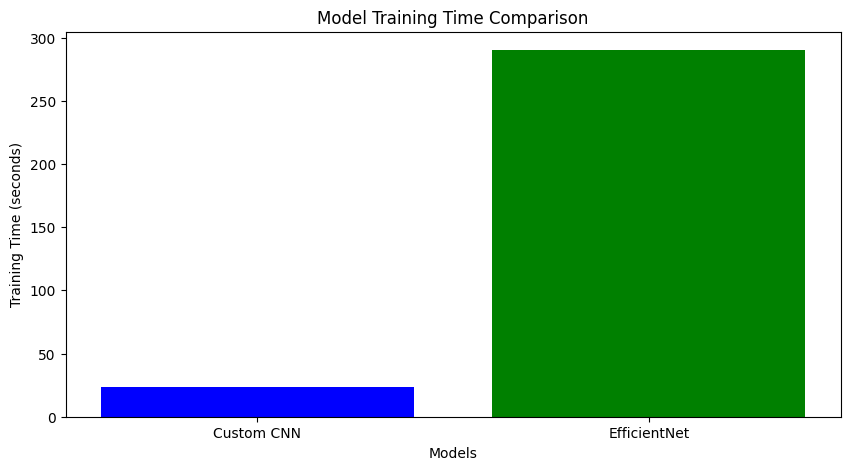

In [49]:
model_names = ['Custom CNN', 'EfficientNet']
accuracies = [accuracy_cnn*100,accuracy_effectnet*100]
training_times = [training_time_CNN,training_time_effectnet]

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 100])
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(model_names, training_times, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Model Training Time Comparison')
plt.show()